




**Group ID:**



  






**Project Name: Predicting Approval for Bank Loan**

#Importing all libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Acquiring the data


In [ ]:
df=pd.read_csv("Bank_loan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
#dropping the Loan_ID column
df=df.drop(['Loan_ID'],axis=1)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#Data Pre-processing

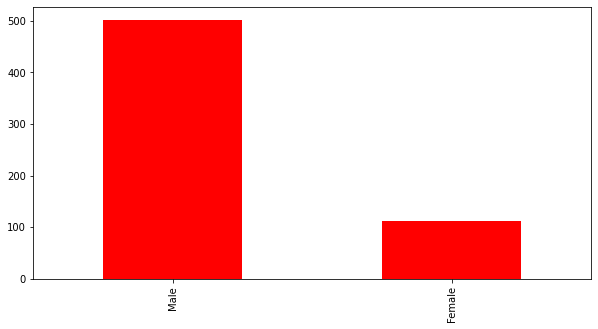

In [ ]:
df["Gender"].value_counts().plot.bar(figsize=(10,5),color="Red")

In [ ]:
#filling null values
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])

In [ ]:
df["Gender"].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [ ]:
df["Married"].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [ ]:
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])

In [ ]:
df["Married"].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [ ]:
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])

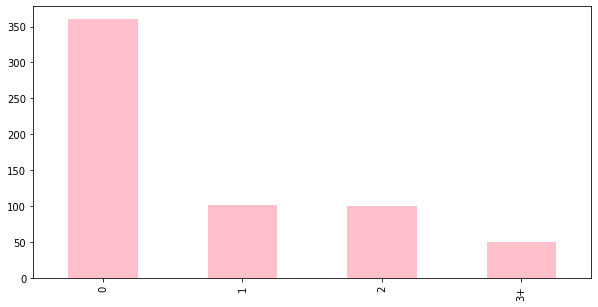

In [ ]:
df["Dependents"].value_counts().plot.bar(figsize=(10,5),color="Pink")

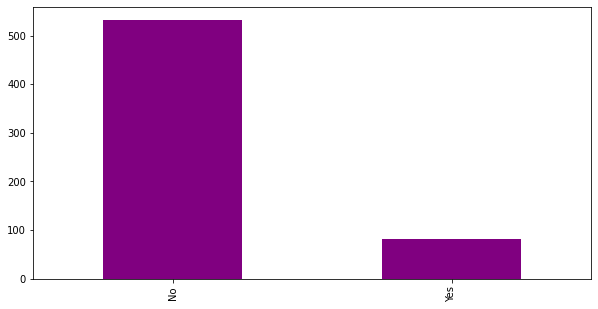

In [ ]:
df["Self_Employed"].value_counts().plot.bar(figsize=(10,5),color="Purple")

In [ ]:
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [ ]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())

In [ ]:
df["LoanAmount"].value_counts()

128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


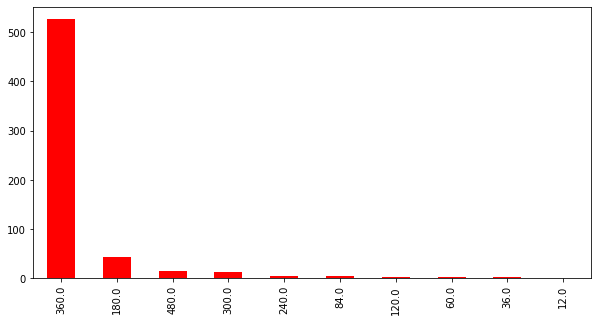

In [ ]:
df["Loan_Amount_Term"].value_counts().plot.bar(figsize=(10,5),color="Red")

In [ ]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


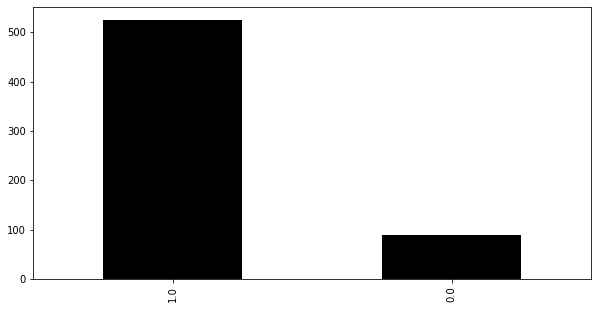

In [ ]:
df["Credit_History"].value_counts().plot.bar(figsize=(10,5),color="Black")

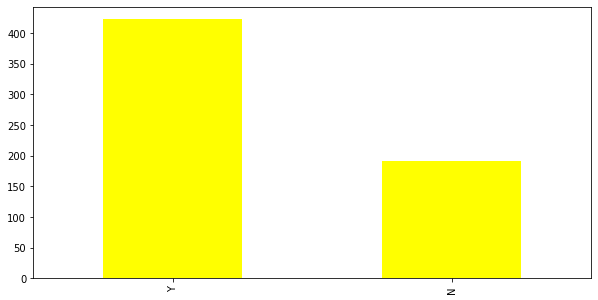

In [ ]:
df["Loan_Status"].value_counts().plot.bar(figsize=(10,5),color="Yellow")

In [ ]:
#df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].median())

In [ ]:
#df["Credit_History"]=df["Credit_History"].fillna(0)
df.Credit_History.unique()

array([1., 0.])

In [ ]:
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])

In [ ]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#Converting catagorical variables into numerical values using label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_Gender = LabelEncoder()
le_Married  = LabelEncoder()
le_Education   = LabelEncoder()
le_Self_Employed  = LabelEncoder()
le_Property_Area  = LabelEncoder()
le_Loan_Status  = LabelEncoder()
le_Dependents  = LabelEncoder()
df['Gender'] =le_Gender.fit_transform(df['Gender'])
df['Married'] =le_Married.fit_transform(df['Married'])
df['Education'] =le_Education.fit_transform(df['Education'])
df['Self_Employed'] = le_Self_Employed .fit_transform(df['Self_Employed'])
df['Property_Area'] =le_Property_Area .fit_transform(df['Property_Area'])
df['Loan_Status'] = le_Loan_Status.fit_transform(df['Loan_Status'])
df['Dependents'] =le_Dependents.fit_transform(df['Dependents'])


In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# Plotting a boxplot

Text(0.5, 1.0, 'Ai.')

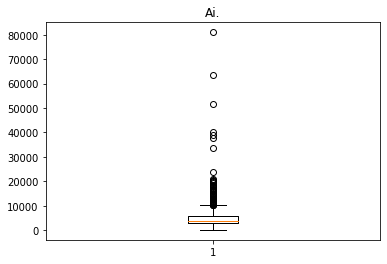

In [ ]:
ax = plt.subplot(111)
plt.boxplot(df['ApplicantIncome'])
ax.set_title('Ai.')

In [ ]:
df=df[df.ApplicantIncome<10000]


#Removing outliers

In [ ]:
''''Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['ApplicantIncome'] >= Q1 - 1.5 * IQR) & (df['ApplicantIncome'] <= Q3 + 1.5 * IQR)
df = df.loc[filter]'''

"'Q1 = df['ApplicantIncome'].quantile(0.25)\nQ3 = df['ApplicantIncome'].quantile(0.75)\nIQR = Q3 - Q1\n\nfilter = (df['ApplicantIncome'] >= Q1 - 1.5 * IQR) & (df['ApplicantIncome'] <= Q3 + 1.5 * IQR)\ndf = df.loc[filter]"

Text(0.5, 1.0, 'Ai.')

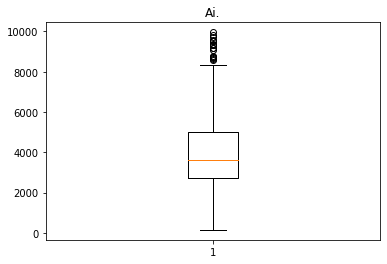

In [ ]:
ax = plt.subplot(111)
plt.boxplot(df['ApplicantIncome'])
ax.set_title('Ai.')

#Dividing dataframe into feature matrix and target variable 

In [ ]:
X=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


#Train-test-split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

#Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
X_train

array([[ 0.45976311,  0.71423745,  2.21669744, ...,  0.27011773,
        -2.4688536 , -0.05703309],
       [ 0.45976311,  0.71423745,  0.24286526, ...,  0.27011773,
         0.40504629,  1.2176564 ],
       [ 0.45976311, -1.4000946 , -0.74405083, ...,  0.27011773,
        -2.4688536 , -0.05703309],
       ...,
       [ 0.45976311, -1.4000946 , -0.74405083, ...,  0.27011773,
         0.40504629,  1.2176564 ],
       [ 0.45976311,  0.71423745,  2.21669744, ...,  0.27011773,
         0.40504629, -0.05703309],
       [ 0.45976311, -1.4000946 , -0.74405083, ...,  0.27011773,
         0.40504629, -0.05703309]])



*   # Random Forest Classifier







1. Training and fitting the model


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=1)
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=1)

2. Testing the model

In [ ]:
predictions=model.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1])

3. New Prediction

In [ ]:
pred_new=model.predict([[ 1,	0,	0,	0,	0,	5849,	0.0,	128.0,	360.0,	1.0,	2]])
print(pred_new)
if(pred_new==1):
  print("Congratulations......Loan Approved !!!!!")
else:
  print("Loan application rejected...")

[1]
Congratulations......Loan Approved !!!!!


In [ ]:
pred_new=model.predict([[0,	0,	0,	0,	1,	4583,	0.0,	133.0,	360.0,	0.0,	1]])
print(pred_new)
if(pred_new==1):
  print("Congratulations......Loan Approved !!!!!")
else:
  print("Loan application rejected...")

[1]
Congratulations......Loan Approved !!!!!


4.Checking Accuracy of our model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,f1_score
print('Accuracy score:', accuracy_score(y_test,predictions))
cm=confusion_matrix(y_test,predictions)
print('confusion_matrix:\n', cm)
print('classification report:\n', classification_report(y_test,predictions))
print('mean absolute error:\n', mean_absolute_error(y_test,predictions))
print('f1 score:\n', f1_score(y_test,predictions))

Accuracy score: 0.8392857142857143
confusion_matrix:
 [[19 16]
 [ 2 75]]
classification report:
               precision    recall  f1-score   support

           0       0.90      0.54      0.68        35
           1       0.82      0.97      0.89        77

    accuracy                           0.84       112
   macro avg       0.86      0.76      0.79       112
weighted avg       0.85      0.84      0.83       112

mean absolute error:
 0.16071428571428573
f1 score:
 0.8928571428571428


5. Plotting heatmap 

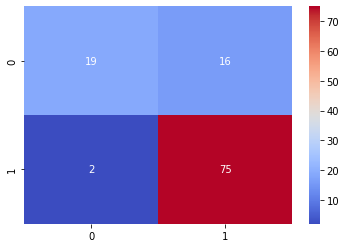

In [ ]:
sns.heatmap(cm,annot=True,cmap='coolwarm')

**Accuracy of Random forest classifier is 83.92 %**



*   # Logistic Regression 







1. Training the model

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

2. Testing the model

In [ ]:
predictions=model.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1])

3. New Prediction

In [ ]:
pred_new=model.predict([[ 1,	0,	0,	0,	0,	5849,	0.0,	128.0,	360.0,	1.0,	2]])
print(pred_new)
if(pred_new==1):
  print("Congratulations......Loan Approved !!!!!")
else:
  print("Loan application rejected...")

[1]
Congratulations......Loan Approved !!!!!


4. Checking Accuracy of our model


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,f1_score
print('Accuracy score:', accuracy_score(y_test,predictions))
cm=confusion_matrix(y_test,predictions)
print('confusion_matrix:\n', cm)
print('classification report:\n', classification_report(y_test,predictions))
print('mean absolute error:\n', mean_absolute_error(y_test,predictions))
print('f1 score:\n', f1_score(y_test,predictions))

Accuracy score: 0.8214285714285714
confusion_matrix:
 [[17 18]
 [ 2 75]]
classification report:
               precision    recall  f1-score   support

           0       0.89      0.49      0.63        35
           1       0.81      0.97      0.88        77

    accuracy                           0.82       112
   macro avg       0.85      0.73      0.76       112
weighted avg       0.83      0.82      0.80       112

mean absolute error:
 0.17857142857142858
f1 score:
 0.8823529411764705


5. Plotting heatmap

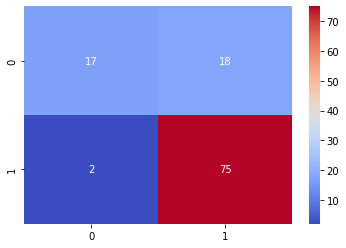

In [ ]:
sns.heatmap(cm,annot=True,cmap='coolwarm')

**Accuracy of Logistic regression is 82.14 %**



*   # Decision Tree Classifier
 



1. Training and fitting the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='entropy', random_state=1)
model.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=1)

2. Testing the model

In [ ]:
predictions=model.predict(X_test)
predictions

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1])

3. Making new predictions

In [ ]:
pred_new=model.predict([[ 1,	0,	0,	0,	0,	5849,	0.0,	128.0,	360.0,	1.0,	2]])
print(pred_new)
if(pred_new==1):
  print("Congratulations......Loan Approved !!!!!")
else:
  print("Loan application rejected...")

[1]
Congratulations......Loan Approved !!!!!


4. Checking accuracy of our model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,f1_score
print('Accuracy score:', accuracy_score(y_test,predictions))
cm=confusion_matrix(y_test,predictions)
print('confusion_matrix:\n', cm)
print('classification report:\n', classification_report(y_test,predictions))
print('mean absolute error:\n', mean_absolute_error(y_test,predictions))
print('f1 score:\n', f1_score(y_test,predictions))

Accuracy score: 0.6607142857142857
confusion_matrix:
 [[21 14]
 [24 53]]
classification report:
               precision    recall  f1-score   support

           0       0.47      0.60      0.52        35
           1       0.79      0.69      0.74        77

    accuracy                           0.66       112
   macro avg       0.63      0.64      0.63       112
weighted avg       0.69      0.66      0.67       112

mean absolute error:
 0.3392857142857143
f1 score:
 0.7361111111111112


5. Plotting Heatmap

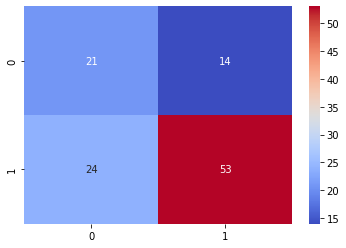

In [ ]:
sns.heatmap(cm,annot=True,cmap='coolwarm')

**Accuracy of  Decision Tree Classifieris 66.07 %**

*   # SVM

1. Training and fitting the model

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='rbf', random_state=1)
model.fit(X_train,y_train)


SVC(random_state=1)

2. Testing the model

In [ ]:
predictions=model.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1])

3. Making new Predictions

In [ ]:
pred_new=model.predict([[ 1,	0,	0,	0,	0,	5849,	0.0,	128.0,	360.0,	1.0,	2]])
print(pred_new)
if(pred_new==1):
  print("Congratulations......Loan Approved !!!!!")
else:
  print("Loan application rejected...")

[1]
Congratulations......Loan Approved !!!!!


4. Checking accuracy of our model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,f1_score
print('Accuracy score:', accuracy_score(y_test,predictions))
cm=confusion_matrix(y_test,predictions)
print('confusion_matrix:\n', cm)
print('classification report:\n', classification_report(y_test,predictions))
print('mean absolute error:\n', mean_absolute_error(y_test,predictions))
print('f1 score:\n', f1_score(y_test,predictions))

Accuracy score: 0.8035714285714286
confusion_matrix:
 [[15 20]
 [ 2 75]]
classification report:
               precision    recall  f1-score   support

           0       0.88      0.43      0.58        35
           1       0.79      0.97      0.87        77

    accuracy                           0.80       112
   macro avg       0.84      0.70      0.72       112
weighted avg       0.82      0.80      0.78       112

mean absolute error:
 0.19642857142857142
f1 score:
 0.872093023255814


5. Plottinh Heatmap

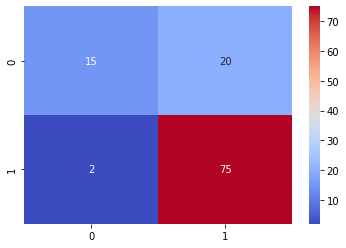

In [ ]:
sns.heatmap(cm,annot=True,cmap='coolwarm')

**Accuracy of SVM is 80.35%**

* # KNN

1. Training the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

2. Testing the model

In [ ]:
predictions=model.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1])

3. Making new predictions

In [ ]:
pred_new=model.predict([[ 1	,1,	1,	0,	0,	4583,	1508.0,	128.0,	360.0,	1.0,	0]])
print(pred_new)
if(pred_new==1):
  print("Congratulations......Loan Approved !!!!!")
else:
  print("Loan application rejected...")

[1]
Congratulations......Loan Approved !!!!!


4. Checking accuracy of our model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,f1_score
print('Accuracy score:', accuracy_score(y_test,predictions))
cm=confusion_matrix(y_test,predictions)
print('confusion_matrix:\n', cm)
print('classification report:\n', classification_report(y_test,predictions))
print('mean absolute error:\n', mean_absolute_error(y_test,predictions))
print('f1 score:\n', f1_score(y_test,predictions))

Accuracy score: 0.8035714285714286
confusion_matrix:
 [[16 19]
 [ 3 74]]
classification report:
               precision    recall  f1-score   support

           0       0.84      0.46      0.59        35
           1       0.80      0.96      0.87        77

    accuracy                           0.80       112
   macro avg       0.82      0.71      0.73       112
weighted avg       0.81      0.80      0.78       112

mean absolute error:
 0.19642857142857142
f1 score:
 0.8705882352941178


5. Plotting Heatmap

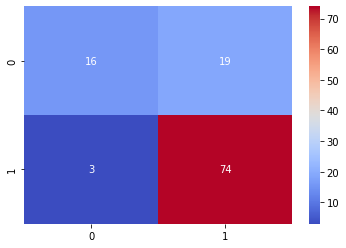

In [ ]:
sns.heatmap(cm,annot=True,cmap='coolwarm')

**Accuracy of KNN is 80.35%**

#Conclusion


1.   Accuracy of KNN is 80.35%

2.   Accuracy of SVM is 80.35%

3.   Accuracy of Decision Tree Classifieris 66.07 %

4.   Accuracy of Logistic regression is 82.14 %

5.   Accuracy of Random forest classifier is 83.92 %

From the above observations we can conclude that Random Forest Claasifier is the best model with highest occuracy of 83.92%
